## Captando os dados anos iniciais
Primeiro vamos ingerir os dados dos anos iniciais. Se der certo basta repetir o processo para outros anos

In [119]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

In [120]:
pd_escolas2017_iniciais = pd.read_csv('./escolas2017_anosIniciais.csv', encoding='latin-1')

/home/marcelostachuk/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3018: DtypeWarning: Columns (223,224) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [121]:
pd_escolas2017_iniciais.columns

Index(['cod_escola_inep', 'regiao', 'unidade_federativa', 'mesoregiao',
       'microregiao', 'municipio', 'tp_dependencia', 'tp_dependencia_desc',
       'tp_rede_publica', 'rede_publica_desc',
       ...
       'Ideb2015', 'Ideb2017', 'ProjecaoIdeb2007', 'ProjecaoIdeb2009',
       'ProjecaoIdeb2011', 'ProjecaoIdeb2013', 'ProjecaoIdeb2015',
       'ProjecaoIdeb2017', 'ProjecaoIdeb2019', 'ProjecaoIdeb2021'],
      dtype='object', length=253)

In [122]:
pd_escolas2017_iniciais.Ideb2017.describe()

count    41503.000000
mean         5.488962
std          1.156717
min          1.100000
25%          4.700000
50%          5.600000
75%          6.300000
max          9.900000
Name: Ideb2017, dtype: float64

In [123]:
#Agora vamos separar os 20% melhores no IDEB
pd_escolas2017_iniciais = pd_escolas2017_iniciais.sort_values(by = 'Ideb2017', ascending=False)

pd_escolas2017_iniciais['isTop25'] = pd_escolas2017_iniciais.Ideb2017.apply(lambda x: x > 6.3)

In [124]:
#vendo de onde são
pd_escolas2017_iniciais[pd_escolas2017_iniciais['isTop25']].groupby(by=['unidade_federativa']).count().regiao

unidade_federativa
Acre                     58
Alagoas                  56
AmapÃÂ¡                  1
Amazonas                123
Bahia                    77
CearÃÂ¡                778
Distrito Federal         89
EspÃÂ­rito Santo       154
GoiÃÂ¡s                366
MaranhÃÂ£o              20
Mato Grosso              92
Mato Grosso do Sul       74
Minas Gerais           1924
ParanÃÂ¡              1015
ParaÃÂ­ba               22
ParÃÂ¡                  38
Pernambuco               73
PiauÃÂ­                131
Rio Grande do Norte      16
Rio Grande do Sul       718
Rio de Janeiro          242
RondÃÂ´nia              78
Roraima                   8
Santa Catarina          799
Sergipe                   3
SÃÂ£o Paulo           3179
Tocantins                52
Name: regiao, dtype: int64

In [125]:
pd_escolas2017_iniciais.columns.tolist()

['cod_escola_inep',
 'regiao',
 'unidade_federativa',
 'mesoregiao',
 'microregiao',
 'municipio',
 'tp_dependencia',
 'tp_dependencia_desc',
 'tp_rede_publica',
 'rede_publica_desc',
 'in_somente_matriculas_ac_ou_aee',
 'tp_rede',
 'tp_rede_nome',
 'tp_rede_cod',
 'nome_escola',
 'num_matriculas',
 'num_estudantes',
 'in_comum_creche',
 'in_comum_pre',
 'in_comum_fund_ai',
 'in_comum_fund_af',
 'in_comum_medio_medio',
 'in_comum_medio_integrado',
 'in_comum_medio_normal',
 'num_estudantes_ensino_infantil',
 'num_estudantes_ensino_fund_anos_iniciais',
 'num_estudantes_ensino_fund_anos_finais',
 'num_estudantes_ensino_medio_propedeutico',
 'num_estudantes_fund_1_ano',
 'num_estudantes_fund_2_ano',
 'num_estudantes_fund_3_ano',
 'num_estudantes_fund_4_ano',
 'num_estudantes_fund_5_ano',
 'num_estudantes_fund_6_ano',
 'num_estudantes_fund_7_ano',
 'num_estudantes_fund_8_ano',
 'num_estudantes_fund_9_ano',
 'num_estudantes_medio_1_serie',
 'num_estudantes_medio_2_serie',
 'num_estudantes_medio_3_serie',
 'num_estudantes_medio_4_serie',
 'num_estudantes_medio_nao_seriada',
 'num_turmas',
 'tp_localizacao',
 'tp_localizacao_desc',
 'tp_categoria_escola_privada',
 'tp_categoria_escola_privada_desc',
 'in_conveniada_pp',
 'tp_convenio_poder_publico',
 'tp_convenio_poder_publico_desc',
 'in_local_func_predio_escolar',
 'tp_ocupacao_predio_escolar',
 'tp_ocupacao_predio_escolar_desc',
 'in_local_func_salas_empresa',
 'in_local_func_socioeducativo',
 'in_local_func_unid_prisional',
 'in_local_func_prisional_socio',
 'in_local_func_templo_igreja',
 'in_local_func_casa_professor',
 'in_local_func_galpao',
 'in_local_func_salas_outra_esc',
 'in_local_func_outros',
 'in_agua_filtrada',
 'in_agua_rede_publica',
 'in_agua_poco_artesiano',
 'in_agua_cacimba',
 'in_agua_fonte_rio',
 'in_agua_inexistente',
 'in_energia_rede_publica',
 'in_energia_gerador',
 'in_energia_outros',
 'in_energia_inexistente',
 'in_esgoto_rede_publica',
 'in_esgoto_fossa',
 'in_esgoto_inexistente',
 'in_lixo_coleta_periodica',
 'in_lixo_queima',
 'in_lixo_joga_outra_area',
 'in_lixo_recicla',
 'in_lixo_enterra',
 'in_lixo_outros',
 'in_sala_diretoria',
 'in_sala_professor',
 'in_laboratorio_informatica',
 'in_laboratorio_ciencias',
 'in_sala_atendimento_especial',
 'in_quadra_esportes_coberta',
 'in_quadra_esportes_descoberta',
 'in_quadra_esportes',
 'in_cozinha',
 'in_biblioteca',
 'in_sala_leitura',
 'in_biblioteca_sala_leitura',
 'in_parque_infantil',
 'in_bercario',
 'in_banheiro_fora_predio',
 'in_banheiro_dentro_predio',
 'in_banheiro_ei',
 'in_banheiro_pne',
 'in_dependencias_pne',
 'in_secretaria',
 'in_banheiro_chuveiro',
 'in_refeitorio',
 'in_despensa',
 'in_almoxarifado',
 'in_auditorio',
 'in_patio_coberto',
 'in_patio_descoberto',
 'in_alojam_aluno',
 'in_alojam_professor',
 'in_area_verde',
 'in_lavanderia',
 'in_dependencias_outras',
 'num_salas_existentes',
 'num_salas_utilizadas',
 'in_equip_tv',
 'in_equip_videocassete',
 'in_equip_dvd',
 'in_equip_parabolica',
 'in_equip_copiadora',
 'in_equip_retroprojetor',
 'in_equip_impressora',
 'in_equip_impressora_mult',
 'in_equip_som',
 'in_equip_multimidia',
 'in_equip_fax',
 'in_equip_foto',
 'in_computador',
 'num_equip_tv',
 'num_equip_videocassete',
 'num_equip_dvd',
 'num_equip_parabolica',
 'num_equip_copiadora',
 'num_equip_retroprojetor',
 'num_equip_impressora',
 'num_equip_impressora_mult',
 'num_equip_som',
 'num_equip_multimidia',
 'num_equip_fax',
 'num_equip_foto',
 'num_computador',
 'num_comp_administrativo',
 'num_comp_aluno',
 'in_internet',
 'in_banda_larga',
 'num_funcionarios',
 'in_alimentacao',
 'num_professores',
 'num_professores_em_regencia',
 'num_professores_em_regencia_fund_ai',
 'num_professores_em_regencia_fund_af',
 'num_professores_em_regencia_ens_medio',
 'tp_aee',
 'tp_atividade_complementar',
 'in_fundamental_ciclos',
 'tp_localizacao_diferenciada',
 'tp_localizacao_diferenciada_desc',
 'in_material_esp_quilombola',
 'in_material_esp_indigena',
 'in_material_esp_nao_uti

In [126]:
#Agora vamos dropar colunas redundantes ou que tem todos valores iguais
red_2drop = ['tp_dependencia', 'tp_rede_publica', 'tp_rede_publica', 'rede_publica_desc', 'tp_rede', 
             'tp_rede_nome', 'tp_rede_cod', 'tp_categoria_escola_privada', 'in_conveniada_pp',
            'tp_convenio_poder_publico', 'tp_convenio_poder_publico_desc', 'tp_ocupacao_predio_escolar',
            'tp_localizacao_diferenciada', 'tp_localizacao', 'tp_categoria_escola_privada_desc']

pd_escolas2017_iniciais = pd_escolas2017_iniciais.drop(labels=red_2drop, axis = 1)
pd_escolas2017_iniciais = pd_escolas2017_iniciais.reset_index(drop = True)

Agora podemos escolher as features X e as labels y

In [127]:
pd_escolas2017_iniciais.columns.tolist()

['cod_escola_inep',
 'regiao',
 'unidade_federativa',
 'mesoregiao',
 'microregiao',
 'municipio',
 'tp_dependencia_desc',
 'in_somente_matriculas_ac_ou_aee',
 'nome_escola',
 'num_matriculas',
 'num_estudantes',
 'in_comum_creche',
 'in_comum_pre',
 'in_comum_fund_ai',
 'in_comum_fund_af',
 'in_comum_medio_medio',
 'in_comum_medio_integrado',
 'in_comum_medio_normal',
 'num_estudantes_ensino_infantil',
 'num_estudantes_ensino_fund_anos_iniciais',
 'num_estudantes_ensino_fund_anos_finais',
 'num_estudantes_ensino_medio_propedeutico',
 'num_estudantes_fund_1_ano',
 'num_estudantes_fund_2_ano',
 'num_estudantes_fund_3_ano',
 'num_estudantes_fund_4_ano',
 'num_estudantes_fund_5_ano',
 'num_estudantes_fund_6_ano',
 'num_estudantes_fund_7_ano',
 'num_estudantes_fund_8_ano',
 'num_estudantes_fund_9_ano',
 'num_estudantes_medio_1_serie',
 'num_estudantes_medio_2_serie',
 'num_estudantes_medio_3_serie',
 'num_estudantes_medio_4_serie',
 'num_estudantes_medio_nao_seriada',
 'num_turmas',
 'tp_localizacao_desc',
 'in_local_func_predio_escolar',
 'tp_ocupacao_predio_escolar_desc',
 'in_local_func_salas_empresa',
 'in_local_func_socioeducativo',
 'in_local_func_unid_prisional',
 'in_local_func_prisional_socio',
 'in_local_func_templo_igreja',
 'in_local_func_casa_professor',
 'in_local_func_galpao',
 'in_local_func_salas_outra_esc',
 'in_local_func_outros',
 'in_agua_filtrada',
 'in_agua_rede_publica',
 'in_agua_poco_artesiano',
 'in_agua_cacimba',
 'in_agua_fonte_rio',
 'in_agua_inexistente',
 'in_energia_rede_publica',
 'in_energia_gerador',
 'in_energia_outros',
 'in_energia_inexistente',
 'in_esgoto_rede_publica',
 'in_esgoto_fossa',
 'in_esgoto_inexistente',
 'in_lixo_coleta_periodica',
 'in_lixo_queima',
 'in_lixo_joga_outra_area',
 'in_lixo_recicla',
 'in_lixo_enterra',
 'in_lixo_outros',
 'in_sala_diretoria',
 'in_sala_professor',
 'in_laboratorio_informatica',
 'in_laboratorio_ciencias',
 'in_sala_atendimento_especial',
 'in_quadra_esportes_coberta',
 'in_quadra_esportes_descoberta',
 'in_quadra_esportes',
 'in_cozinha',
 'in_biblioteca',
 'in_sala_leitura',
 'in_biblioteca_sala_leitura',
 'in_parque_infantil',
 'in_bercario',
 'in_banheiro_fora_predio',
 'in_banheiro_dentro_predio',
 'in_banheiro_ei',
 'in_banheiro_pne',
 'in_dependencias_pne',
 'in_secretaria',
 'in_banheiro_chuveiro',
 'in_refeitorio',
 'in_despensa',
 'in_almoxarifado',
 'in_auditorio',
 'in_patio_coberto',
 'in_patio_descoberto',
 'in_alojam_aluno',
 'in_alojam_professor',
 'in_area_verde',
 'in_lavanderia',
 'in_dependencias_outras',
 'num_salas_existentes',
 'num_salas_utilizadas',
 'in_equip_tv',
 'in_equip_videocassete',
 'in_equip_dvd',
 'in_equip_parabolica',
 'in_equip_copiadora',
 'in_equip_retroprojetor',
 'in_equip_impressora',
 'in_equip_impressora_mult',
 'in_equip_som',
 'in_equip_multimidia',
 'in_equip_fax',
 'in_equip_foto',
 'in_computador',
 'num_equip_tv',
 'num_equip_videocassete',
 'num_equip_dvd',
 'num_equip_parabolica',
 'num_equip_copiadora',
 'num_equip_retroprojetor',
 'num_equip_impressora',
 'num_equip_impressora_mult',
 'num_equip_som',
 'num_equip_multimidia',
 'num_equip_fax',
 'num_equip_foto',
 'num_computador',
 'num_comp_administrativo',
 'num_comp_aluno',
 'in_internet',
 'in_banda_larga',
 'num_funcionarios',
 'in_alimentacao',
 'num_professores',
 'num_professores_em_regencia',
 'num_professores_em_regencia_fund_ai',
 'num_professores_em_regencia_fund_af',
 'num_professores_em_regencia_ens_medio',
 'tp_aee',
 'tp_atividade_complementar',
 'in_fundamental_ciclos',
 'tp_localizacao_diferenciada_desc',
 'in_material_esp_quilombola',
 'in_material_esp_indigena',
 'in_material_esp_nao_utiliza',
 'in_educacao_indigena',
 'in_brasil_alfabetizado',
 'in_final_semana',
 'in_formacao_alternancia',
 'cod_municipio',
 'num_matriculas_ensino_integral',
 'num_estudantes_ensino_integral',
 'tp_integral',
 'TaxaAprovacao2005_1ao5ano',
 'TaxaAprovacao2005_1ano',
 'TaxaAprovacao2005_2ano',
 'TaxaAprovacao2005_3ano',
 'TaxaAprovacao2005_4

In [128]:
y = pd_escolas2017_iniciais['isTop25']

#Colunas que não fazem sentido ser features
drop_tolabel = ['isTop25', 'cod_escola_inep', 'mesoregiao', 'microregiao', 'municipio', 'NotaProvaBrasil_MT_2017',
               'NotaProvaBrasil_LP_2017', 'NotaProvaBrasil_NotaMedia_2017', 'Ideb2017', 'nome_escola',
               'cod_municipio']
X = pd_escolas2017_iniciais.drop(labels=drop_tolabel, axis = 1)


In [129]:
objects_columns = X.dtypes.reset_index()['index'][X.dtypes.reset_index()[0].apply(lambda x: x=='object')]
objects_columns 

0                                regiao
1                    unidade_federativa
2                   tp_dependencia_desc
32                  tp_localizacao_desc
34      tp_ocupacao_predio_escolar_desc
137    tp_localizacao_diferenciada_desc
203             NotaProvaBrasil_MT_2009
204             NotaProvaBrasil_LP_2009
206             NotaProvaBrasil_MT_2011
207             NotaProvaBrasil_LP_2011
209             NotaProvaBrasil_MT_2013
210             NotaProvaBrasil_LP_2013
212             NotaProvaBrasil_MT_2015
213             NotaProvaBrasil_LP_2015
Name: index, dtype: object

In [130]:
#Vamos separar os enconding
list_toEncoding = ['regiao', 'unidade_federativa', 'tp_dependencia_desc', 'tp_localizacao_desc',
                  'tp_ocupacao_predio_escolar_desc', 'tp_localizacao_diferenciada_desc']

df_encoding = X[list_toEncoding]

In [131]:
X_nocat = X.drop(labels=list_toEncoding, axis=1)
X_nocat = X_nocat.reset_index(drop = True)

In [132]:
enc = OneHotEncoder(handle_unknown='ignore')
ohe = enc.fit_transform(df_encoding).toarray()
names = enc.get_feature_names()
df_hotencoding = pd.DataFrame(data = ohe, columns=names)

In [133]:
X_ohe = X_nocat.join(df_hotencoding, how='outer')

In [134]:
X_ohe.dtypes.tolist()

[dtype('bool'),
 dtype('float64'),
 dtype('float64'),
 dtype('bool'),
 dtype('bool'),
 dtype('bool'),
 dtype('bool'),
 dtype('bool'),
 dtype('bool'),
 dtype('bool'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('bool'),
 dtype('bool'),
 dtype('bool'),
 dtype('bool'),
 dtype('bool'),
 dtype('bool'),
 dtype('bool'),
 dtype('bool'),
 dtype('bool'),
 dtype('bool'),
 dtype('bool'),
 dtype('bool'),
 dtype('bool'),
 dtype('bool'),
 dtype('bool'),
 dtype('bool'),
 dtype('bool'),
 dtype('bool'),
 dtype('bool'),
 dtype('bool'),
 dtype('bool'),
 dtype('bool'),
 dtype('bool'),
 dtype('bool'),
 dtype('bool'),
 dtype('bool'),
 dtype('bool'),
 dtype('bool'),
 dtype('bool'),
 dtype('bool'),
 dtype('bool'),
 dtype('bool'),
 dtype('bool'),
 dtype('bool'),
 dtype('bool'),
 dtype('bool'),
 dtype('bool'),
 dtype('bool'),
 dtype('bool'),
 dtype('bool'),
 dtype('bool'),
 dtype('bool'),
 dtype('bool'),
 dtype('bool'),
 dtype('bool'),
 dtype('bool'),
 dtype('bool'),
 dtype('bool'),
 dtype('bool'),
 dtype('bool'),
 dtype('bool'),
 dtype('bool'),
 dtype('bool'),
 dtype('bool'),
 dtype('bool'),
 dtype('bool'),
 dtype('bool'),
 dtype('bool'),
 dtype('bool'),
 dtype('bool'),
 dtype('bool'),
 dtype('float64'),
 dtype('float64'),
 dtype('bool'),
 dtype('bool'),
 dtype('bool'),
 dtype('bool'),
 dtype('bool'),
 dtype('bool'),
 dtype('bool'),
 dtype('bool'),
 dtype('bool'),
 dtype('bool'),
 dtype('bool'),
 dtype('bool'),
 dtype('bool'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('bool'),
 dtype('bool'),
 dtype('float64'),
 dtype('bool'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('bool'),
 dtype('bool'),
 dtype('bool'),
 dtype('bool'),
 dtype('bool'),
 dtype('bool'),
 dtype('bool'),
 dtype('bool'),
 dtype('float64'),
 dtype('float64'),
 dtype('bool'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('O'),
 dtype('O'),
 dtype('float64'),
 dtype('O'),
 dtype('O'),
 dtype('float64'),
 dtype('O'),
 dtype('O'),
 dtype('float64'),
 dtype('O'),
 dtype('O'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float

### BoostTime

In [135]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
import itertools
import xgboost as xgb

In [136]:
#Ta dando pau com essas features depois eu mexo mais
to_float = ['NotaProvaBrasil_MT_2009', 'NotaProvaBrasil_LP_2009', 'NotaProvaBrasil_MT_2011', 
            'NotaProvaBrasil_LP_2011', 'NotaProvaBrasil_MT_2013', 'NotaProvaBrasil_LP_2013',
           'NotaProvaBrasil_MT_2015', 'NotaProvaBrasil_LP_2015']
X_ohe = X_ohe.drop(labels=to_float, axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_ohe, y, test_size=0.30)

In [137]:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [138]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.889085214039033

In [139]:
y_ohe = model.predict(X_ohe)
check = pd_escolas2017_iniciais
check['predTop25'] = y_ohe
check[['regiao', 'unidade_federativa','municipio','isTop25', 'predTop25']]

,regiao,unidade_federativa,municipio,isTop25,predTop25
0,Nordeste,Alagoas,Coruripe,True,True
1,Nordeste,CearÃÂ¡,Sobral,True,True
2,Nordeste,CearÃÂ¡,Sobral,True,True
3,Nordeste,CearÃÂ¡,Pedra Branca,True,True
4,Nordeste,Alagoas,Coruripe,True,True
5,Nordeste,CearÃÂ¡,Sobral,True,True
6,Nordeste,CearÃÂ¡,Sobral,True,True
7,Nordeste,CearÃÂ¡,Pedra Branca,True,True
8,Nordeste,CearÃÂ¡,Sobral,True,True
9,Nordeste,CearÃÂ¡,Pedra Branca,True,True


Procurando falsos positivos

In [140]:
check[check['predTop25']][~check['isTop25']][['regiao', 'unidade_federativa','municipio','isTop25', 'predTop25', 'Ideb2017']]

/home/marcelostachuk/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,regiao,unidade_federativa,municipio,isTop25,predTop25,Ideb2017
10187,Sul,ParanÃÂ¡,Toledo,False,True,6.3
10188,Sul,ParanÃÂ¡,Santa Helena,False,True,6.3
10194,Sudeste,Minas Gerais,Ouro Preto,False,True,6.3
10196,Sul,Rio Grande do Sul,Santo ÃÂngelo,False,True,6.3
10200,Sul,ParanÃÂ¡,Toledo,False,True,6.3
10201,Sudeste,Minas Gerais,RibeirÃÂ£o das Neves,False,True,6.3
10205,Sul,Rio Grande do Sul,Santiago,False,True,6.3
10208,Sul,Santa Catarina,FlorianÃÂ³polis,False,True,6.3
10213,Sudeste,Minas Gerais,UberlÃÂ¢ndia,False,True,6.3
10216,Sudeste,Minas Gerais,Igaratinga,False,True,6.3


In [141]:
check[check['predTop25']][~check['isTop25']].Ideb2017.describe()

/home/marcelostachuk/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


count    1800.000000
mean        6.063389
std         0.257427
min         4.400000
25%         5.900000
50%         6.100000
75%         6.300000
max         6.300000
Name: Ideb2017, dtype: float64

Agora falsos negativos

In [142]:
check[~check['predTop25']][check['isTop25']][['regiao', 'unidade_federativa','municipio','isTop25', 'predTop25', 'Ideb2017']]

/home/marcelostachuk/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,regiao,unidade_federativa,municipio,isTop25,predTop25,Ideb2017
19,Nordeste,CearÃÂ¡,Granja,True,False,9.3
25,Nordeste,CearÃÂ¡,Itatira,True,False,9.2
33,Nordeste,CearÃÂ¡,Granja,True,False,9.1
38,Nordeste,CearÃÂ¡,Mauriti,True,False,9.0
41,Nordeste,CearÃÂ¡,Itatira,True,False,9.0
49,Nordeste,CearÃÂ¡,Itatira,True,False,8.9
51,Nordeste,CearÃÂ¡,Granja,True,False,8.9
53,Nordeste,CearÃÂ¡,Penaforte,True,False,8.9
56,Nordeste,CearÃÂ¡,Deputado Irapuan Pinheiro,True,False,8.9
59,Nordeste,CearÃÂ¡,MilhÃÂ£,True,False,8.8


## Shapando carai
Vamos testar o shap values pra ver oq acontece

In [143]:
import xgboost
import shap

# load JS visualization code to notebook
shap.initjs()

# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, and scikit-learn models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_ohe)

# visualize the first prediction's explanation
shap.force_plot(explainer.expected_value, shap_values[0:5,:], X_ohe.iloc[0:5,:])

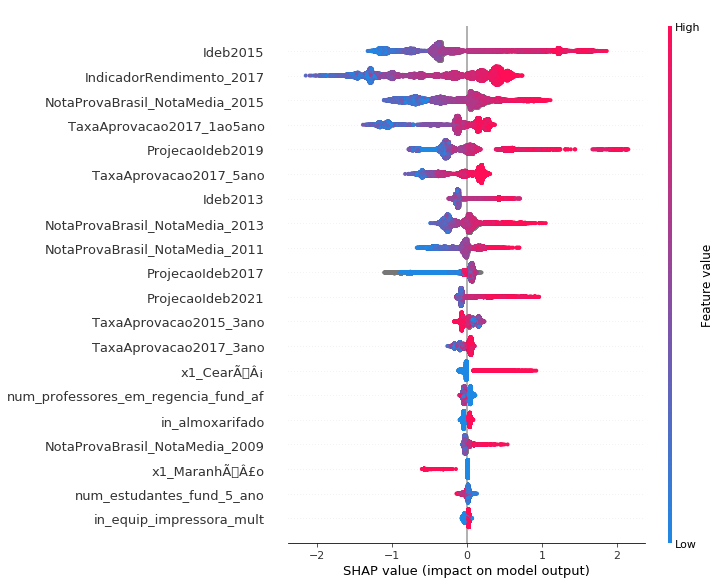

In [144]:
shap.summary_plot(shap_values, X_ohe)

Ok nada inesperado, idebs anteriores estão fortemente correlacionados com idebs de anos atuais. Proximo passo é tirar esses indicadores pra ver oq acontece com o modelo de predição

## Refazendo a porra toda

In [145]:
X_new = X_ohe
X_new.columns.tolist()

['in_somente_matriculas_ac_ou_aee',
 'num_matriculas',
 'num_estudantes',
 'in_comum_creche',
 'in_comum_pre',
 'in_comum_fund_ai',
 'in_comum_fund_af',
 'in_comum_medio_medio',
 'in_comum_medio_integrado',
 'in_comum_medio_normal',
 'num_estudantes_ensino_infantil',
 'num_estudantes_ensino_fund_anos_iniciais',
 'num_estudantes_ensino_fund_anos_finais',
 'num_estudantes_ensino_medio_propedeutico',
 'num_estudantes_fund_1_ano',
 'num_estudantes_fund_2_ano',
 'num_estudantes_fund_3_ano',
 'num_estudantes_fund_4_ano',
 'num_estudantes_fund_5_ano',
 'num_estudantes_fund_6_ano',
 'num_estudantes_fund_7_ano',
 'num_estudantes_fund_8_ano',
 'num_estudantes_fund_9_ano',
 'num_estudantes_medio_1_serie',
 'num_estudantes_medio_2_serie',
 'num_estudantes_medio_3_serie',
 'num_estudantes_medio_4_serie',
 'num_estudantes_medio_nao_seriada',
 'num_turmas',
 'in_local_func_predio_escolar',
 'in_local_func_salas_empresa',
 'in_local_func_socioeducativo',
 'in_local_func_unid_prisional',
 'in_local_func_prisional_socio',
 'in_local_func_templo_igreja',
 'in_local_func_casa_professor',
 'in_local_func_galpao',
 'in_local_func_salas_outra_esc',
 'in_local_func_outros',
 'in_agua_filtrada',
 'in_agua_rede_publica',
 'in_agua_poco_artesiano',
 'in_agua_cacimba',
 'in_agua_fonte_rio',
 'in_agua_inexistente',
 'in_energia_rede_publica',
 'in_energia_gerador',
 'in_energia_outros',
 'in_energia_inexistente',
 'in_esgoto_rede_publica',
 'in_esgoto_fossa',
 'in_esgoto_inexistente',
 'in_lixo_coleta_periodica',
 'in_lixo_queima',
 'in_lixo_joga_outra_area',
 'in_lixo_recicla',
 'in_lixo_enterra',
 'in_lixo_outros',
 'in_sala_diretoria',
 'in_sala_professor',
 'in_laboratorio_informatica',
 'in_laboratorio_ciencias',
 'in_sala_atendimento_especial',
 'in_quadra_esportes_coberta',
 'in_quadra_esportes_descoberta',
 'in_quadra_esportes',
 'in_cozinha',
 'in_biblioteca',
 'in_sala_leitura',
 'in_biblioteca_sala_leitura',
 'in_parque_infantil',
 'in_bercario',
 'in_banheiro_fora_predio',
 'in_banheiro_dentro_predio',
 'in_banheiro_ei',
 'in_banheiro_pne',
 'in_dependencias_pne',
 'in_secretaria',
 'in_banheiro_chuveiro',
 'in_refeitorio',
 'in_despensa',
 'in_almoxarifado',
 'in_auditorio',
 'in_patio_coberto',
 'in_patio_descoberto',
 'in_alojam_aluno',
 'in_alojam_professor',
 'in_area_verde',
 'in_lavanderia',
 'in_dependencias_outras',
 'num_salas_existentes',
 'num_salas_utilizadas',
 'in_equip_tv',
 'in_equip_videocassete',
 'in_equip_dvd',
 'in_equip_parabolica',
 'in_equip_copiadora',
 'in_equip_retroprojetor',
 'in_equip_impressora',
 'in_equip_impressora_mult',
 'in_equip_som',
 'in_equip_multimidia',
 'in_equip_fax',
 'in_equip_foto',
 'in_computador',
 'num_equip_tv',
 'num_equip_videocassete',
 'num_equip_dvd',
 'num_equip_parabolica',
 'num_equip_copiadora',
 'num_equip_retroprojetor',
 'num_equip_impressora',
 'num_equip_impressora_mult',
 'num_equip_som',
 'num_equip_multimidia',
 'num_equip_fax',
 'num_equip_foto',
 'num_computador',
 'num_comp_administrativo',
 'num_comp_aluno',
 'in_internet',
 'in_banda_larga',
 'num_funcionarios',
 'in_alimentacao',
 'num_professores',
 'num_professores_em_regencia',
 'num_professores_em_regencia_fund_ai',
 'num_professores_em_regencia_fund_af',
 'num_professores_em_regencia_ens_medio',
 'tp_aee',
 'tp_atividade_complementar',
 'in_fundamental_ciclos',
 'in_material_esp_quilombola',
 'in_material_esp_indigena',
 'in_material_esp_nao_utiliza',
 'in_educacao_indigena',
 'in_brasil_alfabetizado',
 'in_final_semana',
 'in_formacao_alternancia',
 'num_matriculas_ensino_integral',
 'num_estudantes_ensino_integral',
 'tp_integral',
 'TaxaAprovacao2005_1ao5ano',
 'TaxaAprovacao2005_1ano',
 'TaxaAprovacao2005_2ano',
 'TaxaAprovacao2005_3ano',
 'TaxaAprovacao2005_4ano',
 'TaxaAprovacao2005_5ano',
 'IndicadorRendimento_2005',
 'TaxaAprovacao2007_1ao5ano',
 'TaxaAprovacao2007_1ano',
 'TaxaAprovacao2007_2ano',
 'TaxaAprovacao2007_3ano',
 'TaxaAprovacao2007_4ano',
 'TaxaAprovacao2007_5ano',
 'IndicadorRendimento_2007'

In [146]:
more2drop = ['TaxaAprovacao2005_1ao5ano', 'TaxaAprovacao2005_1ano', 'TaxaAprovacao2005_2ano', 
             'TaxaAprovacao2005_3ano', 'TaxaAprovacao2005_4ano', 'TaxaAprovacao2005_5ano', 
             'IndicadorRendimento_2005', 'TaxaAprovacao2007_1ao5ano', 'TaxaAprovacao2007_1ano', 
             'TaxaAprovacao2007_2ano', 'TaxaAprovacao2007_3ano', 'TaxaAprovacao2007_4ano', 
             'TaxaAprovacao2007_5ano', 'IndicadorRendimento_2007', 'TaxaAprovacao2009_1ao5ano', 
             'TaxaAprovacao2009_1ano', 'TaxaAprovacao2009_2ano', 'TaxaAprovacao2009_3ano', 
             'TaxaAprovacao2009_4ano', 'TaxaAprovacao2009_5ano', 'IndicadorRendimento_2009', 
             'TaxaAprovacao2011_1ao5ano', 'TaxaAprovacao2011_1ano', 'TaxaAprovacao2011_2ano', 
             'TaxaAprovacao2011_3ano', 'TaxaAprovacao2011_4ano', 'TaxaAprovacao2011_5ano', 
             'IndicadorRendimento_2011', 'TaxaAprovacao2013_1ao5ano', 'TaxaAprovacao2013_1ano', 
             'TaxaAprovacao2013_2ano', 'TaxaAprovacao2013_3ano', 'TaxaAprovacao2013_4ano', 
             'TaxaAprovacao2013_5ano', 'IndicadorRendimento_2013', 'TaxaAprovacao2015_1ao5ano', 
             'TaxaAprovacao2015_1ano', 'TaxaAprovacao2015_2ano', 'TaxaAprovacao2015_3ano', 
             'TaxaAprovacao2015_4ano', 'TaxaAprovacao2015_5ano', 'IndicadorRendimento_2015', 
             'TaxaAprovacao2017_1ao5ano', 'TaxaAprovacao2017_1ano', 'TaxaAprovacao2017_2ano', 
             'TaxaAprovacao2017_3ano', 'TaxaAprovacao2017_4ano', 'TaxaAprovacao2017_5ano', 
             'IndicadorRendimento_2017', 'NotaProvaBrasil_MT_2005', 'NotaProvaBrasil_LP_2005', 
             'NotaProvaBrasil_NotaMedia_2005', 'NotaProvaBrasil_MT_2007', 'NotaProvaBrasil_LP_2007', 
             'NotaProvaBrasil_NotaMedia_2007', 'NotaProvaBrasil_NotaMedia_2009', 'NotaProvaBrasil_NotaMedia_2011', 
             'NotaProvaBrasil_NotaMedia_2013', 'NotaProvaBrasil_NotaMedia_2015', 'Ideb2005', 'Ideb2007', 
             'Ideb2009', 'Ideb2011', 'Ideb2013', 'Ideb2015', 'ProjecaoIdeb2007', 'ProjecaoIdeb2009', 
             'ProjecaoIdeb2011', 'ProjecaoIdeb2013', 'ProjecaoIdeb2015', 'ProjecaoIdeb2017', 'ProjecaoIdeb2019', 
             'ProjecaoIdeb2021']

X_new = X_new.drop(labels=more2drop, axis=1)

In [147]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_new, y, test_size=0.30)

model2 = XGBClassifier()
model2.fit(X_train2, y_train2)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [148]:
y_pred2 = model2.predict(X_test2)
accuracy2 = accuracy_score(y_test2, y_pred2)
accuracy2

0.796964099269135

In [149]:
# load JS visualization code to notebook
shap.initjs()

# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, and scikit-learn models)
explainer = shap.TreeExplainer(model2)
shap_values = explainer.shap_values(X_new)

# visualize the first prediction's explanation
shap.force_plot(explainer.expected_value, shap_values[0,:], X_new.iloc[1,:])

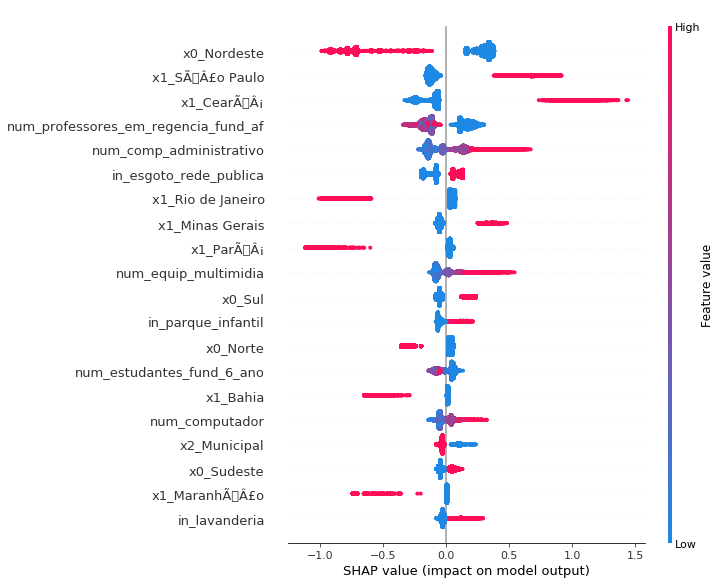

In [150]:
shap.summary_plot(shap_values, X_new)

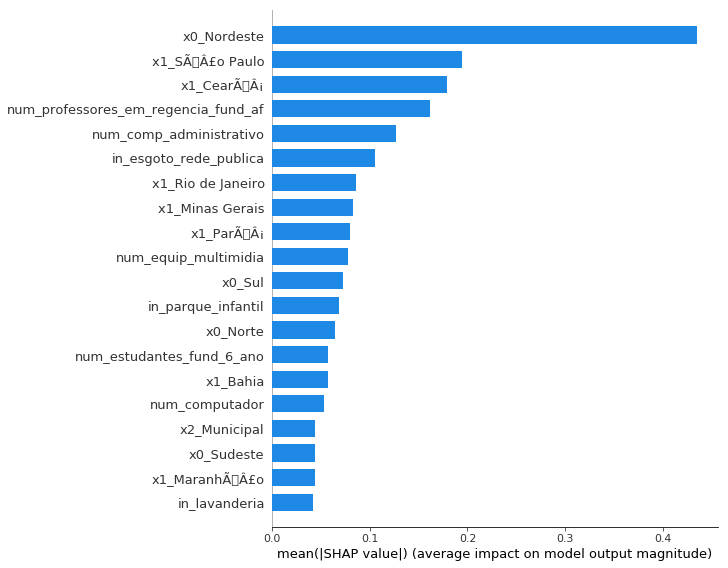

In [151]:
shap.summary_plot(shap_values, X_new, plot_type="bar")

Podemos tirar algumas conclusões daqui

1 - Estados e regiões são ilhas no IDEB tanto que aparecem como features. Podemos então pensar em novas features que representem estados que não sejam o nome propriamente dito a fim de saber o que leva um estado a ser bom na educação (por exemplo sabemos que ceara e são paulo são features relevantes, porem não sabemos o que deles é uma feature, assim vale a pena investigar mais isso)

2 - Existem parâmetros da propria escola que influenciam na nota do ideb mesmo com os parâmetros regionais se sobressaindo. Vale a pena investigar quais deles são mais influentes retirando as influências regionais (desde que a classificação ainda se saia bem)

3 - 

### Refazendo sem as features regionais

In [173]:
taxas2drop = ['TaxaAprovacao2005_1ao5ano', 'TaxaAprovacao2005_1ano', 'TaxaAprovacao2005_2ano', 
             'TaxaAprovacao2005_3ano', 'TaxaAprovacao2005_4ano', 'TaxaAprovacao2005_5ano', 
             'IndicadorRendimento_2005', 'TaxaAprovacao2007_1ao5ano', 'TaxaAprovacao2007_1ano', 
             'TaxaAprovacao2007_2ano', 'TaxaAprovacao2007_3ano', 'TaxaAprovacao2007_4ano', 
             'TaxaAprovacao2007_5ano', 'IndicadorRendimento_2007', 'TaxaAprovacao2009_1ao5ano', 
             'TaxaAprovacao2009_1ano', 'TaxaAprovacao2009_2ano', 'TaxaAprovacao2009_3ano', 
             'TaxaAprovacao2009_4ano', 'TaxaAprovacao2009_5ano', 'IndicadorRendimento_2009', 
             'TaxaAprovacao2011_1ao5ano', 'TaxaAprovacao2011_1ano', 'TaxaAprovacao2011_2ano', 
             'TaxaAprovacao2011_3ano', 'TaxaAprovacao2011_4ano', 'TaxaAprovacao2011_5ano', 
             'IndicadorRendimento_2011', 'TaxaAprovacao2013_1ao5ano', 'TaxaAprovacao2013_1ano', 
             'TaxaAprovacao2013_2ano', 'TaxaAprovacao2013_3ano', 'TaxaAprovacao2013_4ano', 
             'TaxaAprovacao2013_5ano', 'IndicadorRendimento_2013', 'TaxaAprovacao2015_1ao5ano', 
             'TaxaAprovacao2015_1ano', 'TaxaAprovacao2015_2ano', 'TaxaAprovacao2015_3ano', 
             'TaxaAprovacao2015_4ano', 'TaxaAprovacao2015_5ano', 'IndicadorRendimento_2015', 
             'TaxaAprovacao2017_1ao5ano', 'TaxaAprovacao2017_1ano', 'TaxaAprovacao2017_2ano', 
             'TaxaAprovacao2017_3ano', 'TaxaAprovacao2017_4ano', 'TaxaAprovacao2017_5ano', 
             'IndicadorRendimento_2017', 'NotaProvaBrasil_MT_2005', 'NotaProvaBrasil_LP_2005', 
             'NotaProvaBrasil_NotaMedia_2005', 'NotaProvaBrasil_MT_2007', 'NotaProvaBrasil_LP_2007', 
             'NotaProvaBrasil_NotaMedia_2007', 'NotaProvaBrasil_NotaMedia_2009', 'NotaProvaBrasil_NotaMedia_2011', 
             'NotaProvaBrasil_NotaMedia_2013', 'NotaProvaBrasil_NotaMedia_2015', 'Ideb2005', 'Ideb2007', 
             'Ideb2009', 'Ideb2011', 'Ideb2013', 'Ideb2015', 'ProjecaoIdeb2007', 'ProjecaoIdeb2009', 
             'ProjecaoIdeb2011', 'ProjecaoIdeb2013', 'ProjecaoIdeb2015', 'ProjecaoIdeb2017', 'ProjecaoIdeb2019', 
             'ProjecaoIdeb2021', 'NotaProvaBrasil_MT_2009', 'NotaProvaBrasil_LP_2009', 'NotaProvaBrasil_MT_2011', 
             'NotaProvaBrasil_LP_2011', 'NotaProvaBrasil_MT_2013', 'NotaProvaBrasil_LP_2013', 
             'NotaProvaBrasil_MT_2015', 'NotaProvaBrasil_LP_2015']
encoding2drop = ['regiao', 'unidade_federativa']
enconding = ['tp_dependencia_desc', 'tp_localizacao_desc', 'tp_ocupacao_predio_escolar_desc', 
             'tp_localizacao_diferenciada_desc']

df_encoding2 = X[enconding]
X_noreg = X.drop(labels=taxas2drop, axis = 1)
X_noreg = X_noreg.drop(labels=encoding2drop, axis=1)
X_noreg = X_noreg.drop(labels=enconding, axis=1)

In [174]:
enc2 = OneHotEncoder(handle_unknown='ignore')
ohe2 = enc2.fit_transform(df_encoding2).toarray()
names2 = enc2.get_feature_names()
df_hotencoding2 = pd.DataFrame(data = ohe2, columns=names2)

In [175]:
X_noreg = X_noreg.reset_index(drop = True)
df_hotencoding2 = df_hotencoding2.reset_index(drop = True)
X_ohe2 = X_noreg.join(df_hotencoding2, how='outer')

In [176]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_ohe2, y, test_size=0.30)

model3 = XGBClassifier()
model3.fit(X_train3, y_train3)
y_pred3 = model3.predict(X_test3)
accuracy3 = accuracy_score(y_test3, y_pred3)
accuracy3

0.7861215966589029

In [177]:
# load JS visualization code to notebook
shap.initjs()

# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, and scikit-learn models)
explainer = shap.TreeExplainer(model3)
shap_values = explainer.shap_values(X_ohe2)

# visualize the first prediction's explanation
shap.force_plot(explainer.expected_value, shap_values[0,:], X_ohe2.iloc[1,:])

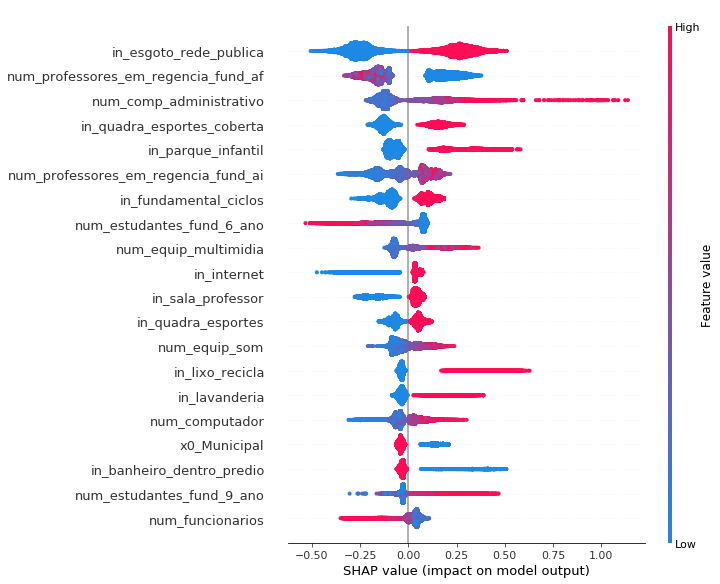

In [178]:
shap.summary_plot(shap_values, X_ohe2)

Ok aqui parece ter dados algum direcionamento interessante, como ter muitos funcionarios nem sempre é bom. Ou entao muitos alunos em sala é ruim.

Vale a pena criar um outro notebook só pra mexer com features exclusivas da escola (inclusive algumas features engenheradas), sem indicadores de rendimento passados (tipo ideb 2015) nem de localidade (tipo, estar em sao paulo ou ceara)